Лабораторна робота 6. Запобігання перенавчанню. L1 і L2 регулярізація.

Завдання 1. Побудова регресійної моделі та запобігання перенавчанню.
Необхідно побудувати регресійну модель на одному з вбудованих датасетів, доступних у
бібліотеці scikit-learn. Основна мета завдання — навчитися побудові регресійних
моделей та уникненню перенавчання (overfitting) шляхом застосування відповідних
технік.

1. Завантаження та підготовка даних:


*   Виберіть вбудований датасет для задачі регресії з бібліотеки scikit-learn
(наприклад, Boston Housing, California Housing) або будь-який датасет
для регресії.
*   Завантажте дані та розділіть їх на навчальну та тестову вибірки
(рекомендується використовувати співвідношення 80/20 або 70/30).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Завантаження даних
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Розділення на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")


Розмір навчальної вибірки: (16512, 8)
Розмір тестової вибірки: (4128, 8)


2. Побудова регресійної моделі:
*   Побудуйте базову лінійну регресійну модель на основі навчальної вибірки.
*   Оцініть точність моделі на тестовій вибірці та визначте її продуктивність,
використовуючи метрики якості регресії (наприклад, mean_squared_error,
R^2).


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ініціалізація моделі
lin_reg = LinearRegression()

# Навчання моделі
lin_reg.fit(X_train, y_train)

# Прогноз на тестовій вибірці
y_pred = lin_reg.predict(X_test)

# Оцінка продуктивності
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error (MSE): 0.5559
R^2 Score: 0.5758


3. Аналіз перенавчання:
* Перевірте наявність перенавчання, порівнюючи результати на навчальній та
тестовій вибірках. Якщо модель показує значно кращі результати на
навчальних даних, це може свідчити про перенавчання.

In [3]:
# Прогноз на навчальній вибірці
y_train_pred = lin_reg.predict(X_train)

# Оцінка продуктивності на навчальній вибірці
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Навчальна вибірка - MSE: {mse_train:.4f}, R^2: {r2_train:.4f}")
print(f"Тестова вибірка - MSE: {mse:.4f}, R^2: {r2:.4f}")


Навчальна вибірка - MSE: 0.5179, R^2: 0.6126
Тестова вибірка - MSE: 0.5559, R^2: 0.5758


4. Запобігання перенавчанню:
* Введіть регуляризацію: використайте моделі з регуляризацією, такі як Ridge
Regression або Lasso Regression.
* Перевірте роботу моделі з різними значеннями параметра регуляризації та
виберіть оптимальне значення.
* Застосуйте крос-валідацію для більш стабільної оцінки продуктивності
моделі.


In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Визначення гіперпараметрів для налаштування
ridge_params = {'alpha': np.logspace(-3, 3, 100)}

# Ініціалізація моделі Ridge
ridge = Ridge()

# Налаштування GridSearchCV для пошуку оптимального alpha
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

print(f"Найкраще alpha для Ridge: {ridge_cv.best_params_['alpha']}")
print(f"Найкращий R^2 на крос-валідації: {ridge_cv.best_score_:.4f}")


Найкраще alpha для Ridge: 8.697490026177835
Найкращий R^2 на крос-валідації: 0.6115


In [5]:
from sklearn.linear_model import Lasso

# Визначення гіперпараметрів для налаштування
lasso_params = {'alpha': np.logspace(-3, 1, 100)}

# Ініціалізація моделі Lasso
lasso = Lasso(max_iter=10000)

# Налаштування GridSearchCV для пошуку оптимального alpha
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_cv.fit(X_train, y_train)

print(f"Найкраще alpha для Lasso: {lasso_cv.best_params_['alpha']}")
print(f"Найкращий R^2 на крос-валідації: {lasso_cv.best_score_:.4f}")


Найкраще alpha для Lasso: 0.001
Найкращий R^2 на крос-валідації: 0.6115


5. Оцінка результатів:
* Оцініть кінцеву продуктивність моделі на тестовій вибірці та порівняйте її з
базовою моделлю.
* Проаналізуйте, як введення регуляризації та використання крос-валідації
вплинули на якість моделі.

In [6]:
# Найкраща модель Ridge
best_ridge = ridge_cv.best_estimator_

# Прогноз на тестовій вибірці
y_ridge_pred = best_ridge.predict(X_test)

# Оцінка продуктивності
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print(f"Ridge Регресія - MSE: {mse_ridge:.4f}, R^2: {r2_ridge:.4f}")


Ridge Регресія - MSE: 0.5551, R^2: 0.5764


In [7]:
# Найкраща модель Lasso
best_lasso = lasso_cv.best_estimator_

# Прогноз на тестовій вибірці
y_lasso_pred = best_lasso.predict(X_test)

# Оцінка продуктивності
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print(f"Lasso Регресія - MSE: {mse_lasso:.4f}, R^2: {r2_lasso:.4f}")


Lasso Регресія - MSE: 0.5539, R^2: 0.5773


In [8]:
print("Порівняння моделей:")
print(f"Базова Лінійна Регресія - MSE: {mse:.4f}, R^2: {r2:.4f}")
print(f"Ridge Регресія - MSE: {mse_ridge:.4f}, R^2: {r2_ridge:.4f}")
print(f"Lasso Регресія - MSE: {mse_lasso:.4f}, R^2: {r2_lasso:.4f}")


Порівняння моделей:
Базова Лінійна Регресія - MSE: 0.5559, R^2: 0.5758
Ridge Регресія - MSE: 0.5551, R^2: 0.5764
Lasso Регресія - MSE: 0.5539, R^2: 0.5773


6. Візуалізація та висновки:
* Побудуйте графіки, що демонструють залежність помилки моделі від
гіперпараметрів регуляризації.
* Підготуйте звіт з висновками щодо ефективності моделі, заходів щодо
запобігання перенавчанню та загальних результатів.

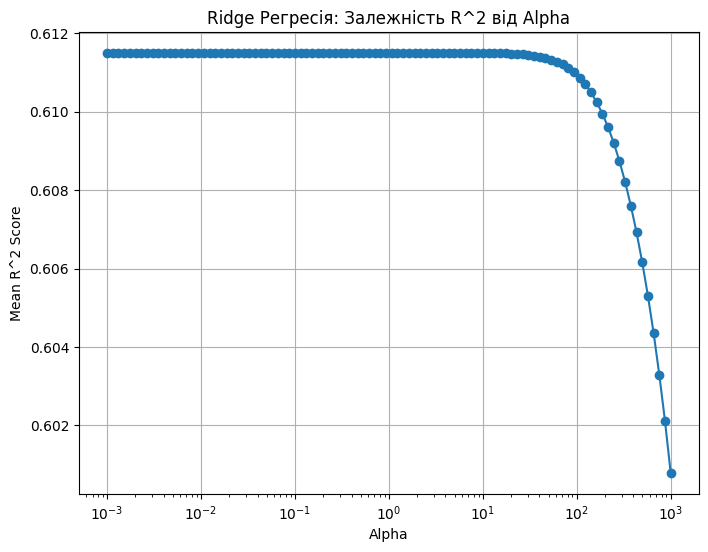

In [9]:
import matplotlib.pyplot as plt

# Отримання результатів GridSearchCV
ridge_alphas = ridge_cv.cv_results_['param_alpha'].data
ridge_scores = ridge_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.semilogx(ridge_alphas, ridge_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean R^2 Score')
plt.title('Ridge Регресія: Залежність R^2 від Alpha')
plt.grid(True)
plt.show()


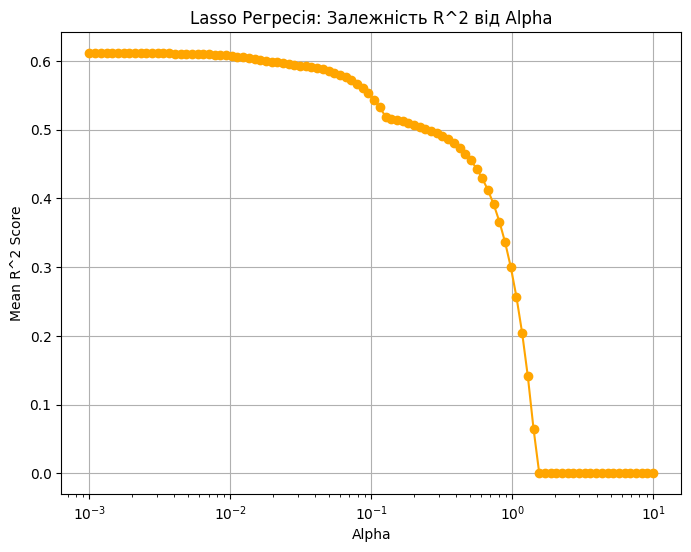

In [10]:
# Отримання результатів GridSearchCV
lasso_alphas = lasso_cv.cv_results_['param_alpha'].data
lasso_scores = lasso_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.semilogx(lasso_alphas, lasso_scores, marker='o', color='orange')
plt.xlabel('Alpha')
plt.ylabel('Mean R^2 Score')
plt.title('Lasso Регресія: Залежність R^2 від Alpha')
plt.grid(True)
plt.show()


Завдання 2. Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.
Зробити візуалізацію кластерів.
Зробити висновки

In [11]:
from sklearn.datasets import load_iris
import pandas as pd

# Завантаження даних
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

print(X.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

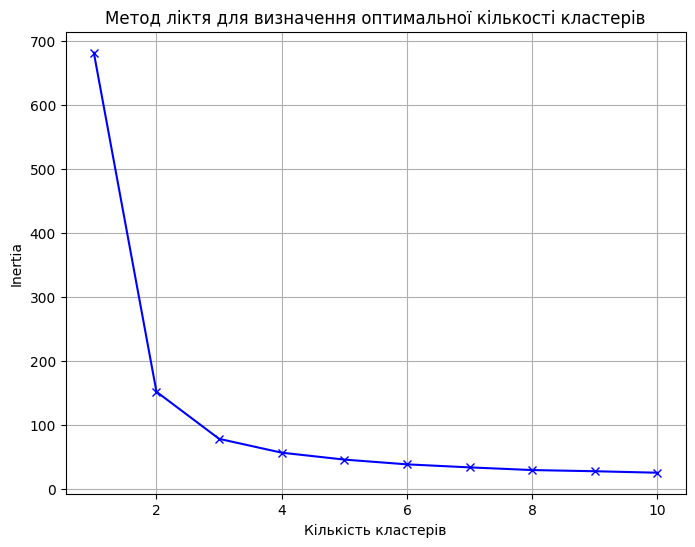

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Застосування методу ліктя для визначення оптимальної кількості кластерів
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.grid(True)
plt.show()


In [13]:
# Вибір оптимальної кількості кластерів (наприклад, 3)
optimal_k = 3

# Побудова моделі KMeans з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Присвоєння кластера кожному спостереженню
X['Cluster'] = kmeans.labels_

print(X.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


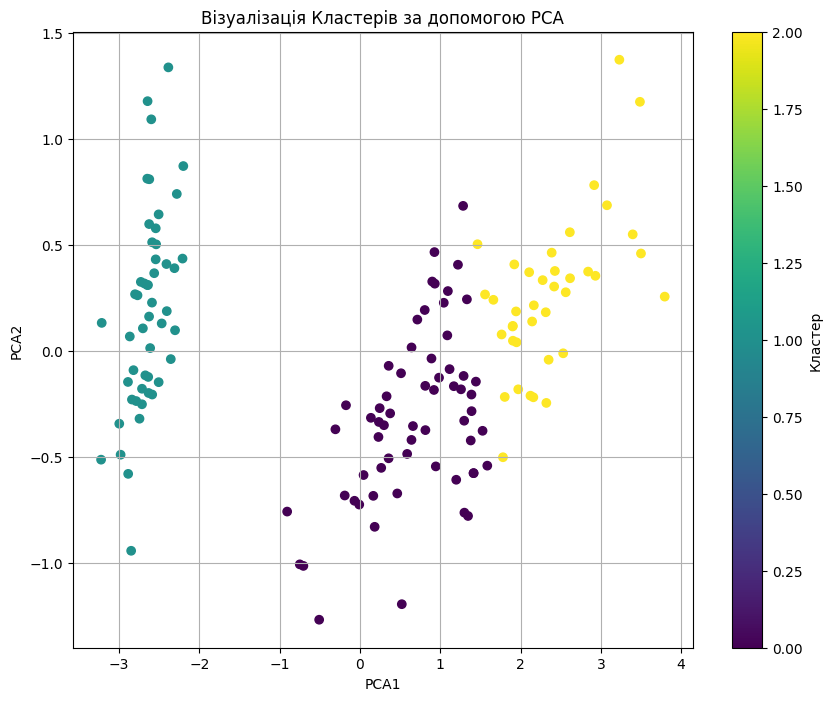

In [14]:
from sklearn.decomposition import PCA

# Застосування PCA для зменшення розмірності до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :-1])

# Додавання результатів PCA до DataFrame
X['PCA1'] = X_pca[:, 0]
X['PCA2'] = X_pca[:, 1]

# Візуалізація кластерів
plt.figure(figsize=(10, 8))
plt.scatter(X['PCA1'], X['PCA2'], c=X['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Візуалізація Кластерів за допомогою PCA')
plt.colorbar(label='Кластер')
plt.grid(True)
plt.show()
